In [1]:
# Importing libraries and packages for basic statistics
import os # To change working directory
import pandas as pd# to read and manipulating data
import numpy as np # to calculate mean and standard deviations
import pickle

In [2]:
# To read 'csv' file with panda library
df = pd.read_csv('/content/Dataset.csv')



In [3]:
# To display the first 10 rows of dataset
display(df.tail(5))

,Temperature,Humidity,N,P,K,Soil,Crop,Fertilizer
294,25.0,50.0,24.0,19.0,0.0,Clayey,Pulses,28-28
295,30.0,60.0,4.0,17.0,17.0,Red,Tobacco,10-26-26
296,38.0,72.0,39.0,0.0,0.0,Loamy,Wheat,Urea
297,36.0,60.0,15.0,41.0,0.0,Sandy,Millets,DAP
298,29.0,58.0,12.0,10.0,0.0,Black,Sugarcane,20-20


In [4]:
# To find Column name
df.columns

Index(['Temperature', 'Humidity', 'N', 'P', 'K', 'Soil', 'Crop', 'Fertilizer'], dtype='object')

In [5]:
# To find the number of rows and columns
print(df.shape)

# check for the data types, memory usage, etc
display(df.info())

(299, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  299 non-null    float64
 1   Humidity     299 non-null    float64
 2   N            299 non-null    float64
 3   P            299 non-null    float64
 4   K            299 non-null    float64
 5   Soil         299 non-null    object 
 6   Crop         299 non-null    object 
 7   Fertilizer   299 non-null    object 
dtypes: float64(5), object(3)
memory usage: 18.8+ KB


None

In [6]:
# checking the no. of missing values in the dataset
df.isnull().sum()

Temperature    0
Humidity       0
N              0
P              0
K              0
Soil           0
Crop           0
Fertilizer     0
dtype: int64

In [7]:
# statistics of the numerical variables
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Temperature,299.0,27.121873,3.649695,20.05,25.0,26.80,29.000,38.00
Humidity,299.0,78.824849,15.259550,50.00,64.0,82.23,92.525,99.98
N,299.0,8.344816,10.011567,2.00,2.5,4.00,10.000,42.00
P,299.0,8.254515,10.654876,0.00,2.1,4.00,9.000,42.00
K,299.0,3.097659,3.392198,0.00,2.0,3.00,3.500,19.00


**Data Visualization**

In [8]:
import matplotlib.pyplot as plt # to visualize graph
%matplotlib inline
import seaborn as sns # for better visualization of graph with the help of Matplotlib

In [9]:
# print the unique class of the Fertilizer
print("There are seven class in Fertilizer: ", df['Fertilizer'].unique())

There are seven class in Fertilizer:  ['DAP and MOP' 'Good NPK' 'MOP' 'Urea and DAP' 'Urea and MOP' 'Urea '
 'DAP' 'Urea' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


<Axes: xlabel='count', ylabel='Fertilizer'>

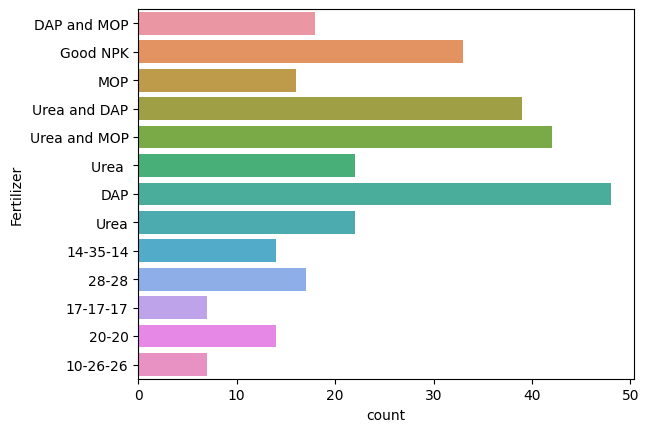

In [10]:
#Visualization of the class in Fertilizer category with countplot
sns.countplot(y='Fertilizer',data=df)

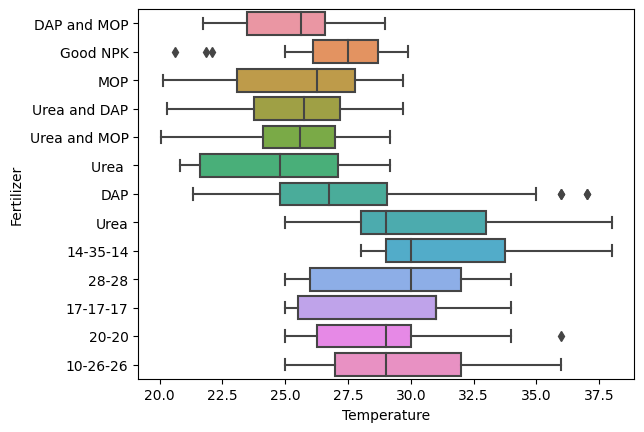

In [11]:
sns.boxplot(x = 'Temperature', y = 'Fertilizer', data = df)
plt.show()

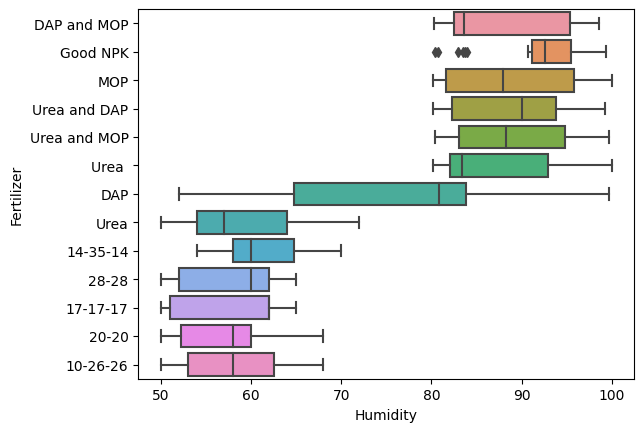

In [12]:
sns.boxplot(x = 'Humidity', y = 'Fertilizer', data = df)
plt.show()

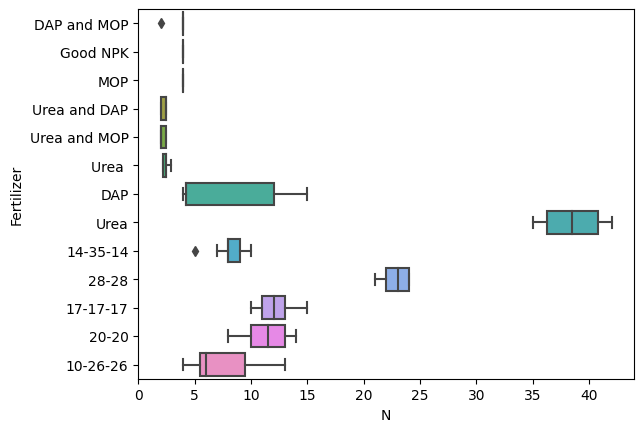

In [13]:
sns.boxplot(x = 'N', y = 'Fertilizer', data = df)
plt.show()

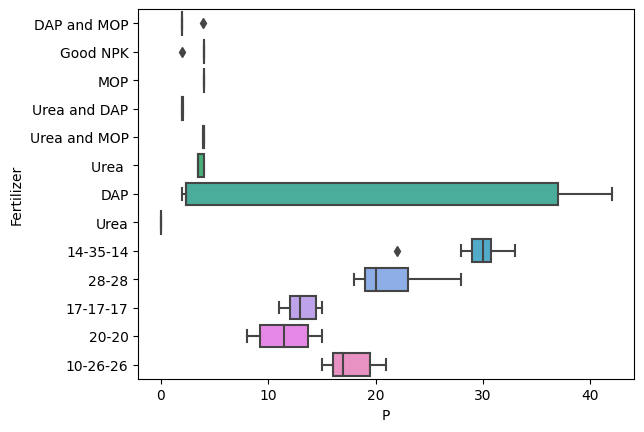

In [14]:
sns.boxplot(x = 'P', y = 'Fertilizer', data = df)
plt.show()

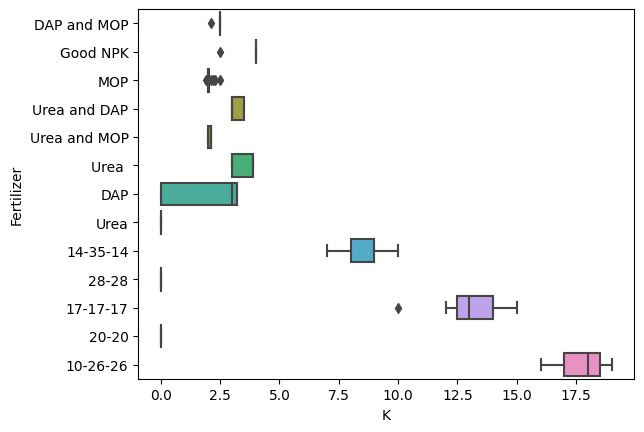

In [15]:
sns.boxplot(x = 'K', y = 'Fertilizer', data = df)
plt.show()

In [16]:
#convert catagorical data to numerical data
df['Crop'],_=pd.factorize(df['Crop'])
df['Soil'],_=pd.factorize(df['Soil'])

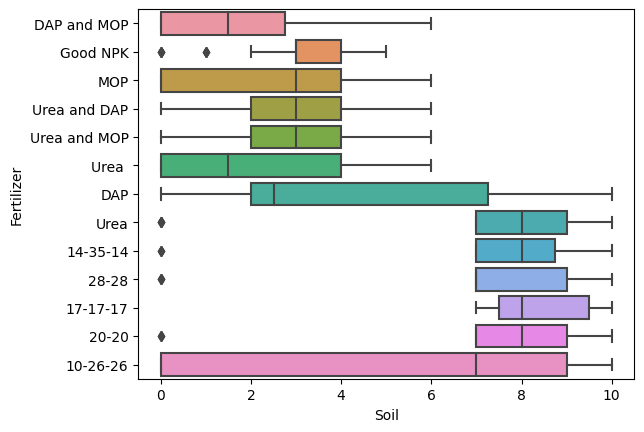

In [17]:
sns.boxplot(x = 'Soil', y = 'Fertilizer', data = df)
plt.show()

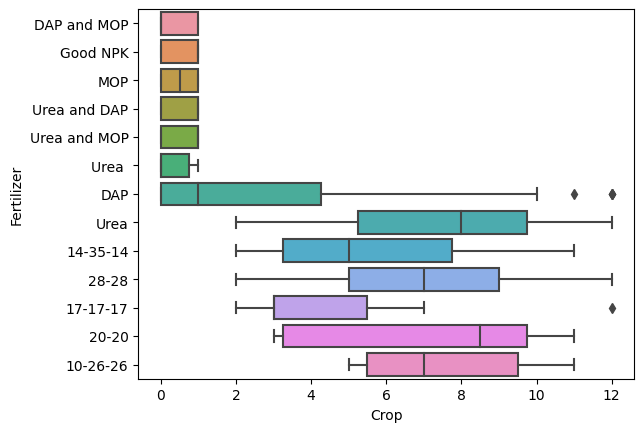

In [18]:
sns.boxplot(x = 'Crop', y = 'Fertilizer', data = df)
plt.show()

In [19]:
c = df.corr()
c

<ipython-input-19-ea39ad7b80a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


,Temperature,Humidity,N,P,K,Soil,Crop
Temperature,1.000000,-0.298659,0.443765,0.502891,0.039062,0.517352,0.539615
Humidity,-0.298659,1.000000,-0.684574,-0.586144,-0.048414,-0.474609,-0.751302
N,0.443765,-0.684574,1.000000,0.177575,-0.279483,0.451983,0.688040
P,0.502891,-0.586144,0.177575,1.000000,0.102692,0.448568,0.564638
K,0.039062,-0.048414,-0.279483,0.102692,1.000000,0.004963,-0.018933
Soil,0.517352,-0.474609,0.451983,0.448568,0.004963,1.000000,0.478567
Crop,0.539615,-0.751302,0.688040,0.564638,-0.018933,0.478567,1.000000


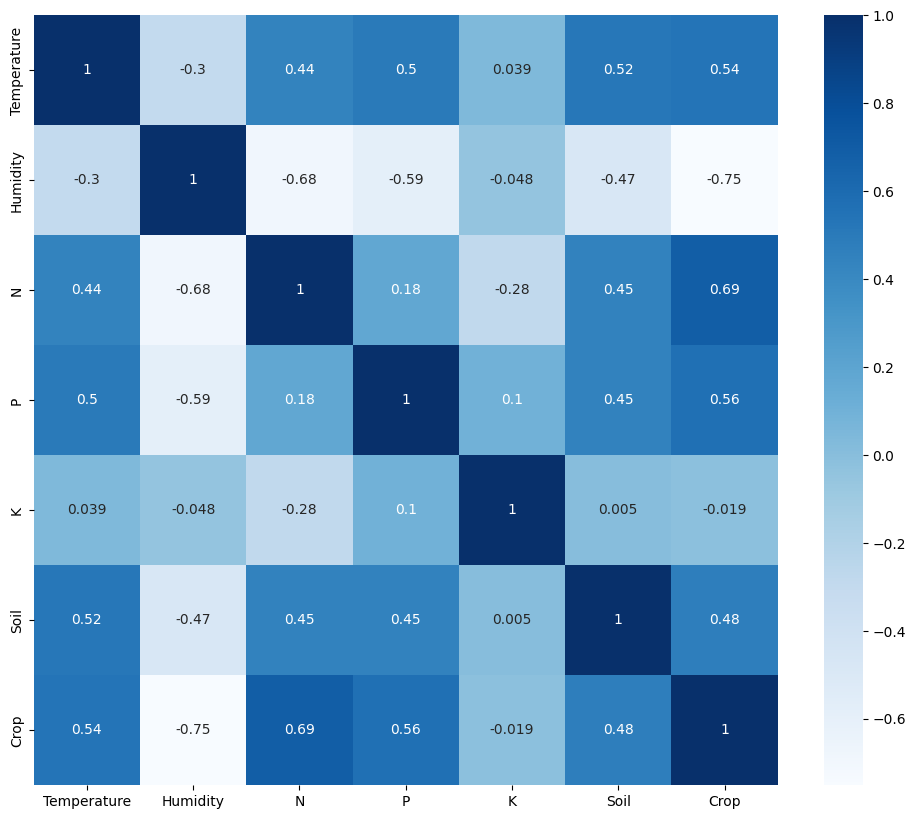

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

In [21]:
df['Fertilizer'],_=pd.factorize(df['Fertilizer'])

In [22]:
x=df.iloc[:,0:7].values    #sklearn accepts input data in 2D numpy array
y=df.iloc[:,7].values           #sklearn accepts output data in 1D numpy array
df.head()
print(type(x))
print(x.ndim)
print(type(y))
print(y.ndim)

<class 'numpy.ndarray'>
2
<class 'numpy.ndarray'>
1


In [23]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)  #Training dataset:75%   #Testing Dataset:25%

# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(type(x_train))
print(x_train.ndim)
print(type(y_train))
print(y_train.ndim)

(224, 7)
(224,)
(75, 7)
(75,)
<class 'numpy.ndarray'>
2
<class 'numpy.ndarray'>
1


In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def gen_metrics(model,ypred,x_train,x_test,y_train,y_test):
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    print('predicted Results\n',ypred)
    cm = confusion_matrix(y_test,ypred)
    print('Confusion Matrix\n',cm)
    print('Classficaition Report\n',classification_report(y_test,ypred))

In [25]:
# Method 1 : Naive Bayes
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
model1 = MultinomialNB()

model1.fit(x_train,y_train)
print(type(model1))
y_pred1 = model1.predict(x_test)

from sklearn.metrics import accuracy_score
model1_accuracy=accuracy_score(y_pred1,y_test)*100
print(model1_accuracy)
gen_metrics(model1,y_pred1,x_train,x_test,y_train,y_test)



<class 'sklearn.naive_bayes.MultinomialNB'>
65.33333333333333
Training score 0.6830357142857143
Testing score 0.6533333333333333
predicted Results
 [11  0  1  9  9  3  9 10  3  5 11  5  4 11  1  4 11  4  7  9  4  1  3  3
 11  4  5  8  9  8  0  1  4  1  9  0  0  0 11  4 12  1  0  3  4  5  9  4
  0  1  3 12  3  4  4  9  5  3 11  3  3  5  5  7  9  9  9  5  4  1  5  8
  9  4  3]
Confusion Matrix
 [[ 2  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  2  0  0  0  0  0  0  0]
 [ 5  2  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2]]
Classficaition Report
               precision    recall 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# # Predict output for some unknown sample
test_X1 = np.array([24.87,82.84,4,2,2.5,0,1]) #0
pred_y1 = model1.predict(test_X1.reshape(1, -1))
print("Prediction1 = ", pred_y1)

test_X2 = np.array([28.69,96.65,4.0,4.0,4.0,1,1]) #1
pred_y2 = model1.predict(test_X2.reshape(1, -1))
print("Prediction2 = ", pred_y2)

test_X3 = np.array([20.27,81.64,4.0,4.0,2.0,2,0]) #2
pred_y3 = model1.predict(test_X3.reshape(1, -1))
print("Prediction3 = ", pred_y3)

test_X4 = np.array([25.07,95.02,2.0,2.1,3.5,3,1]) #3
pred_y4 = model1.predict(test_X4.reshape(1, -1))
print("Prediction4 = ", pred_y4)

test_X5 = np.array([25.04,95.90,2.0,3.9,2.1,4,1]) #4
pred_y5 = model1.predict(test_X5.reshape(1, -1))
print("Prediction5 = ", pred_y5)

test_X6 = np.array([36.0,60.0,15.0,41.0,0.0,7,9]) #6
pred_y6 = model1.predict(test_X6.reshape(1, -1))
print("Prediction6 = ", pred_y6)

test_X7 = np.array([25.0,50.0,24.0,19.0,0.0,0,11]) #8
pred_y7 = model1.predict(test_X7.reshape(1, -1))
print("Prediction7 = ", pred_y7)

test_X8 = np.array([38,72,39,0,0,8,8])  #5
pred_y8 = model1.predict(test_X8.reshape(1, -1))
print("Prediction8 = ", pred_y8)

test_X9 = np.array([29.0,58.0,12.0,10.0,0.0,9,3]) #10
pred_y9 = model1.predict(test_X9.reshape(1, -1))
print("Prediction9 = ", pred_y9)

test_X10 = np.array([30.0,60.0,4.0,17.0,17.0,10,5]) #11
pred_y10 = model1.predict(test_X10.reshape(1, -1))
print("Prediction10 = ", pred_y10)

Prediction1 =  [0]
Prediction2 =  [1]
Prediction3 =  [4]
Prediction4 =  [3]
Prediction5 =  [4]
Prediction6 =  [9]
Prediction7 =  [9]
Prediction8 =  [7]
Prediction9 =  [11]
Prediction10 =  [12]


In [27]:
# Method 2 : SVC

from sklearn.svm import SVC
model2 = SVC(kernel='linear')
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

from sklearn.metrics import accuracy_score
model2_accuracy=accuracy_score(y_pred2,y_test)*100
print(model2_accuracy)
gen_metrics(model2,y_pred2,x_train,x_test,y_train,y_test)

98.66666666666667
Training score 0.9955357142857143
Testing score 0.9866666666666667
predicted Results
 [11  6  1  6  6  3  6 10  3  1 11  5  4 11  1  4 11  4  7  9  4  6  3  3
 11  4  4  8  9  8  0  1  4  1  9  6  6  6 11  5 12  1  0  0  5  1  9  4
  6  6  3 12  3  5  4  9  1  3 11  3  3  3  2  7  9  6  6  5  2  1  3  8
  9  5  3]
Confusion Matrix
 [[ 3  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2]]
Classficaition Report
               precision    recall  f1-score   support

           0       1.00

In [28]:
# # Predict output for some unknown sample
test_X1 = np.array([24.87,82.84,4,2,2.5,0,1])
pred_y1 = model2.predict(test_X1.reshape(1, -1))
print("Prediction1 = ", pred_y1)

test_X2 = np.array([28.69,96.65,4.0,4.0,4.0,1,1])
pred_y2 = model2.predict(test_X2.reshape(1, -1))
print("Prediction2 = ", pred_y2)

test_X3 = np.array([20.27,81.64,4.0,4.0,2.0,2,0])
pred_y3 = model2.predict(test_X3.reshape(1, -1))
print("Prediction3 = ", pred_y3)

test_X4 = np.array([25.07,95.02,2.0,2.1,3.5,3,1])
pred_y4 = model2.predict(test_X4.reshape(1, -1))
print("Prediction4 = ", pred_y4)

test_X5 = np.array([25.04,95.90,2.0,3.9,2.1,4,1])
pred_y5 = model2.predict(test_X5.reshape(1, -1))
print("Prediction5 = ", pred_y5)

test_X6 = np.array([36.0,60.0,15.0,41.0,0.0,7,9])
pred_y6 = model2.predict(test_X6.reshape(1, -1))
print("Prediction6 = ", pred_y6)

test_X7 = np.array([25.0,50.0,24.0,19.0,0.0,0,11])
pred_y7 = model2.predict(test_X7.reshape(1, -1))
print("Prediction7 = ", pred_y7)

test_X8 = np.array([38,72,39,0,0,8,8])
pred_y8 = model2.predict(test_X8.reshape(1, -1))
print("Prediction8 = ", pred_y8)

test_X9 = np.array([29.0,58.0,12.0,10.0,0.0,9,3])
pred_y9 = model2.predict(test_X9.reshape(1, -1))
print("Prediction9 = ", pred_y9)

test_X10 = np.array([30.0,60.0,4.0,17.0,17.0,10,5])
pred_y10 = model2.predict(test_X10.reshape(1, -1))
print("Prediction10 = ", pred_y10)

Prediction1 =  [0]
Prediction2 =  [1]
Prediction3 =  [2]
Prediction4 =  [3]
Prediction5 =  [4]
Prediction6 =  [6]
Prediction7 =  [9]
Prediction8 =  [7]
Prediction9 =  [11]
Prediction10 =  [12]


In [29]:
# Method 3 : Logistic Regression

from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train,y_train) #to train the machine / to prepare my model for predictions
y_pred3 = model3.predict(x_test)

from sklearn.metrics import accuracy_score
model3_accuracy=accuracy_score(y_pred3,y_test)*100
print(model3_accuracy)
gen_metrics(model3,y_pred3,x_train,x_test,y_train,y_test)

84.0
Training score 0.8571428571428571
Testing score 0.84
predicted Results
 [11  6  1  6  6  3  6 10  3  1 11  5  4 11  1  4 11  4  7  9  4  1  3  3
 11  4  4  8  9  8  0  1  4  1  9  6  1  0 11  4 12  1  0  6  1  1  9  4
  6  1  3 12  3  4  4  9  1  3 11  3  3  3  6  7  9  6  6  5  6  1  3  8
  9  3  3]
Confusion Matrix
 [[ 2  0  0  0  1  0  1  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  2  2  0  0  0  0  0  0  0]
 [ 1  3  0  0  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.67      0.50      0.57       

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [30]:
# # Predict output for some unknown sample
test_X1 = np.array([24.87,82.84,4,2,2.5,0,1])
pred_y1 = model3.predict(test_X1.reshape(1, -1))
print("Prediction1 = ", pred_y1)

test_X2 = np.array([28.69,96.65,4.0,4.0,4.0,1,1])
pred_y2 = model3.predict(test_X2.reshape(1, -1))
print("Prediction2 = ", pred_y2)

test_X3 = np.array([20.27,81.64,4.0,4.0,2.0,2,0])
pred_y3 = model3.predict(test_X3.reshape(1, -1))
print("Prediction3 = ", pred_y3)

test_X4 = np.array([25.07,95.02,2.0,2.1,3.5,3,1])
pred_y4 = model3.predict(test_X4.reshape(1, -1))
print("Prediction4 = ", pred_y4)

test_X5 = np.array([25.04,95.90,2.0,3.9,2.1,4,1])
pred_y5 = model3.predict(test_X5.reshape(1, -1))
print("Prediction5 = ", pred_y5)

test_X6 = np.array([36.0,60.0,15.0,41.0,0.0,7,9])
pred_y6 = model3.predict(test_X6.reshape(1, -1))
print("Prediction6 = ", pred_y6)

test_X7 = np.array([25.0,50.0,24.0,19.0,0.0,0,11])
pred_y7 = model3.predict(test_X7.reshape(1, -1))
print("Prediction7 = ", pred_y7)

test_X8 = np.array([38,72,39,0,0,8,8])
pred_y8 = model3.predict(test_X8.reshape(1, -1))
print("Prediction8 = ", pred_y8)

test_X9 = np.array([29.0,58.0,12.0,10.0,0.0,9,3])
pred_y9 = model3.predict(test_X9.reshape(1, -1))
print("Prediction9 = ", pred_y9)

test_X10 = np.array([30.0,60.0,4.0,17.0,17.0,10,5])
pred_y10 = model3.predict(test_X10.reshape(1, -1))
print("Prediction10 = ", pred_y10)

Prediction1 =  [6]
Prediction2 =  [1]
Prediction3 =  [2]
Prediction4 =  [3]
Prediction5 =  [4]
Prediction6 =  [6]
Prediction7 =  [9]
Prediction8 =  [7]
Prediction9 =  [11]
Prediction10 =  [12]


In [31]:
# Method 4 : KNN

from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=5)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)

from sklearn.metrics import accuracy_score
model4_accuracy=accuracy_score(y_pred4,y_test)*100
print(model4_accuracy)
gen_metrics(model4,y_pred4,x_train,x_test,y_train,y_test)

68.0
Training score 0.8080357142857143
Testing score 0.68
predicted Results
 [11  6  1  6  6  3  6 10  3  6 11  3  4 11  1  4 11  3  7  9  4  6  4  3
 11  4  4  8  9  8  6  1  4  1  9  0  0  0 11  3 12  1  6  6  3  0  9  4
  6  6  1 10  3  1  2  9  5  3 11  6  3  6  0  7  9  6  6  5  1  1  3  8
  9  5  0]
Confusion Matrix
 [[0 0 0 0 1 0 3 0 0 0 0 0 0]
 [1 6 0 0 0 1 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 7 1 0 2 0 0 0 0 0 0]
 [0 0 1 1 6 0 0 0 0 0 0 0 0]
 [0 1 0 3 0 2 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 9 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      0.67      0.67         9
           2       0.00      0.00      0.00         2
           3       0.64      0.58      0.61        12
   

In [32]:
# # Predict output for some unknown sample
test_X1 = np.array([24.87,82.84,4,2,2.5,0,1])
pred_y1 = model4.predict(test_X1.reshape(1, -1))
print("Prediction1 = ", pred_y1)

test_X2 = np.array([28.69,96.65,4.0,4.0,4.0,1,1])
pred_y2 = model4.predict(test_X2.reshape(1, -1))
print("Prediction2 = ", pred_y2)

test_X3 = np.array([20.27,81.64,4.0,4.0,2.0,2,0])
pred_y3 = model4.predict(test_X3.reshape(1, -1))
print("Prediction3 = ", pred_y3)

test_X4 = np.array([25.07,95.02,2.0,2.1,3.5,3,1])
pred_y4 = model4.predict(test_X4.reshape(1, -1))
print("Prediction4 = ", pred_y4)

test_X5 = np.array([25.04,95.90,2.0,3.9,2.1,4,1])
pred_y5 = model4.predict(test_X5.reshape(1, -1))
print("Prediction5 = ", pred_y5)

test_X6 = np.array([36.0,60.0,15.0,41.0,0.0,7,9])
pred_y6 = model4.predict(test_X6.reshape(1, -1))
print("Prediction6 = ", pred_y6)

test_X7 = np.array([25.0,50.0,24.0,19.0,0.0,0,11])
pred_y7 = model4.predict(test_X7.reshape(1, -1))
print("Prediction7 = ", pred_y7)

test_X8 = np.array([38,72,39,0,0,8,8])
pred_y8 = model4.predict(test_X8.reshape(1, -1))
print("Prediction8 = ", pred_y8)

test_X9 = np.array([29.0,58.0,12.0,10.0,0.0,9,3])
pred_y9 = model4.predict(test_X9.reshape(1, -1))
print("Prediction9 = ", pred_y9)

test_X10 = np.array([30.0,60.0,4.0,17.0,17.0,10,5])
pred_y10 = model4.predict(test_X10.reshape(1, -1))
print("Prediction10 = ", pred_y10)

Prediction1 =  [0]
Prediction2 =  [1]
Prediction3 =  [2]
Prediction4 =  [4]
Prediction5 =  [4]
Prediction6 =  [6]
Prediction7 =  [9]
Prediction8 =  [7]
Prediction9 =  [11]
Prediction10 =  [10]


In [33]:
#method 5 Decision Tree
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier( criterion = "entropy", random_state = 0, max_depth = 4, min_samples_leaf = 2) #max_depth may change with features
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)

from sklearn.metrics import accuracy_score
model5_accuracy=accuracy_score(y_test,y_pred5)*100
print(model5_accuracy)
gen_metrics(model5,y_pred5,x_train,x_test,y_train,y_test)


80.0
Training score 0.84375
Testing score 0.8
predicted Results
 [ 6  6  1  6  6  3  6 10  3  1  6  5  4  6  1  4  6  4  7  9  4  0  3  3
  6  4  4  8  9  8  0  1  4  1  9  0  6  0  6  5 10  1  0  0  5  1  9  4
  6  6  3 10  3  5  4  9  1  3  6  3  3  3  0  7  9  6  6  5  0  1  3  8
  9  5  3]
Confusion Matrix
 [[ 3  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# # Predict output for some unknown sample
test_X1 = np.array([24.87,82.84,4,2,2.5,0,1])
pred_y1 = model5.predict(test_X1.reshape(1, -1))
print("Prediction1 = ", pred_y1)

test_X2 = np.array([28.69,96.65,4.0,4.0,4.0,1,1])
pred_y2 = model5.predict(test_X2.reshape(1, -1))
print("Prediction2 = ", pred_y2)

test_X3 = np.array([20.27,81.64,4.0,4.0,2.0,2,0])
pred_y3 = model5.predict(test_X3.reshape(1, -1))
print("Prediction3 = ", pred_y3)

test_X4 = np.array([25.07,95.02,2.0,2.1,3.5,3,1])
pred_y4 = model5.predict(test_X4.reshape(1, -1))
print("Prediction4 = ", pred_y4)

test_X5 = np.array([25.04,95.90,2.0,3.9,2.1,4,1])
pred_y5 = model5.predict(test_X5.reshape(1, -1))
print("Prediction5 = ", pred_y5)

test_X6 = np.array([36.0,60.0,15.0,41.0,0.0,7,9])
pred_y6 = model5.predict(test_X6.reshape(1, -1))
print("Prediction6 = ", pred_y6)

test_X7 = np.array([25.0,50.0,24.0,19.0,0.0,0,11])
pred_y7 = model5.predict(test_X7.reshape(1, -1))
print("Prediction7 = ", pred_y7)

test_X8 = np.array([38,72,39,0,0,8,8])
pred_y8 = model5.predict(test_X8.reshape(1, -1))
print("Prediction8 = ", pred_y8)

test_X9 = np.array([29.0,58.0,12.0,10.0,0.0,9,3])
pred_y9 = model5.predict(test_X9.reshape(1, -1))
print("Prediction9 = ", pred_y9)

test_X10 = np.array([30.0,60.0,4.0,17.0,17.0,10,5])
pred_y10 = model5.predict(test_X10.reshape(1, -1))
print("Prediction10 = ", pred_y10)

Prediction1 =  [0]
Prediction2 =  [1]
Prediction3 =  [0]
Prediction4 =  [3]
Prediction5 =  [4]
Prediction6 =  [6]
Prediction7 =  [9]
Prediction8 =  [7]
Prediction9 =  [6]
Prediction10 =  [10]


In [35]:
#Method 6 : Random Forest

from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(random_state=1)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)

from sklearn.metrics import accuracy_score
model6_accuracy=accuracy_score(y_test,y_pred6)*100
print(model6_accuracy)
gen_metrics(model6,y_pred6,x_train,x_test,y_train,y_test)

97.33333333333334
Training score 1.0
Testing score 0.9733333333333334
predicted Results
 [11  6  1  6  6  3  6 10  3  1 11  5  4 11  1  4 11  4  7  9  4  6  3  3
 11  4  4  8  9  8  1  1  4  1  9  6  6  6 11  5 12  1  0  0  5  1  9  4
  6  6  3 12  3  5  4  9  1  3 11  3  3  3  2  7  9  6  6  5  2  1  3  8
  9  5  3]
Confusion Matrix
 [[ 2  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2]]
Classficaition Report
               precision    recall  f1-score   support

           0       1.00      0.50     

In [36]:
# # Predict output for some unknown sample
test_X1 = np.array([24.87,82.84,4,2,2.5,0,1])
pred_y1 = model6.predict(test_X1.reshape(1, -1))
print("Prediction1 = ", pred_y1)

test_X2 = np.array([28.69,96.65,4.0,4.0,4.0,1,1])
pred_y2 = model6.predict(test_X2.reshape(1, -1))
print("Prediction2 = ", pred_y2)

test_X3 = np.array([20.27,81.64,4.0,4.0,2.0,2,0])
pred_y3 = model6.predict(test_X3.reshape(1, -1))
print("Prediction3 = ", pred_y3)

test_X4 = np.array([25.07,95.02,2.0,2.1,3.5,3,1])
pred_y4 = model6.predict(test_X4.reshape(1, -1))
print("Prediction4 = ", pred_y4)

test_X5 = np.array([25.04,95.90,2.0,3.9,2.1,4,1])
pred_y5 = model6.predict(test_X5.reshape(1, -1))
print("Prediction5 = ", pred_y5)

test_X6 = np.array([36.0,60.0,15.0,41.0,0.0,7,9])
pred_y6 = model6.predict(test_X6.reshape(1, -1))
print("Prediction6 = ", pred_y6)

test_X7 = np.array([25.0,50.0,24.0,19.0,0.0,0,11])
pred_y7 = model6.predict(test_X7.reshape(1, -1))
print("Prediction7 = ", pred_y7)

test_X8 = np.array([38,72,39,0,0,8,8])
pred_y8 = model6.predict(test_X8.reshape(1, -1))
print("Prediction8 = ", pred_y8)

test_X9 = np.array([29.0,58.0,12.0,10.0,0.0,9,3])
pred_y9 = model6.predict(test_X9.reshape(1, -1))
print("Prediction9 = ", pred_y9)

test_X10 = np.array([30.0,60.0,4.0,17.0,17.0,10,5])
pred_y10 = model6.predict(test_X10.reshape(1, -1))
print("Prediction10 = ", pred_y10)

Prediction1 =  [0]
Prediction2 =  [1]
Prediction3 =  [2]
Prediction4 =  [3]
Prediction5 =  [4]
Prediction6 =  [6]
Prediction7 =  [9]
Prediction8 =  [7]
Prediction9 =  [11]
Prediction10 =  [12]


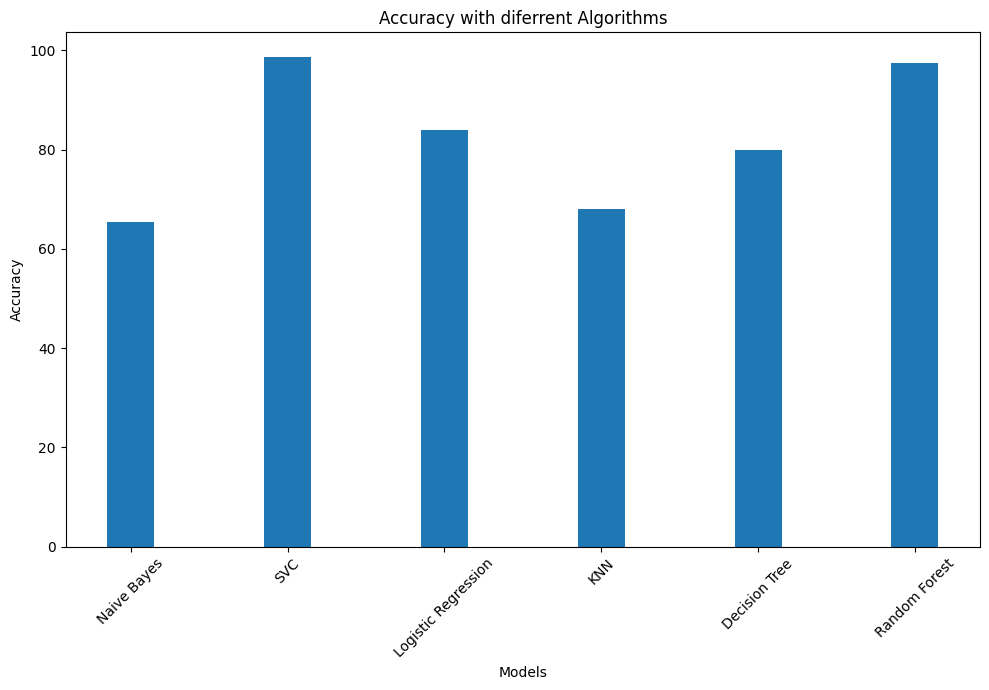

In [37]:
models=[model1_accuracy, model2_accuracy, model3_accuracy, model4_accuracy, model5_accuracy , model6_accuracy]
names=["Naive Bayes", "SVC", "Logistic Regression", "KNN", "Decision Tree","Random Forest"]

x=np.arange(len(names))
width=0.3
fig,ax=plt.subplots(figsize=(10,7))
rects=ax.bar(x,models,width)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
ax.set_title('Accuracy with diferrent Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names,rotation=45)
fig.tight_layout()
plt.show()

In [38]:
pickle.dump(model6,open('fertilizer.pkl', 'wb'))